In [3]:
Retail Analysis with Walmart Data

DESCRIPTION : 
    
One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc. 
Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available. 

Dataset Description 

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields: 
Store - the store number 
Date - the week of sales 
Weekly_Sales - sales for the given store 
Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week 
Temperature - Temperature on the day of sale 
Fuel_Price - Cost of fuel in the region 
CPI – Prevailing consumer price index 
Unemployment - Prevailing unemployment rate 

Holiday Events 

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13 
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13 
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13 
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
    
Analysis Tasks

A. Basic Statistics tasks 
1. Which store has maximum sales 
2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation 
3. Which store/s has good quarterly growth rate in Q3’2012 
4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together 
5. Provide a monthly and semester view of sales in units and give insights 

B. Statistical Model 

For Store 1 – Build prediction models to forecast demand 
1. Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales. 
2. Change dates into days by creating new variable.

Select the model which gives best accuracy.

SyntaxError: invalid syntax (<ipython-input-3-f20505b130c0>, line 1)

In [6]:
#Import Libraries
import pandas as pd

In [7]:
#Adding dataset
Walmart_data=pd.read_csv("Walmart_Store_sales.csv")

In [8]:
Walmart_data.shape

(6435, 8)

In [9]:
Walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [10]:
Walmart_data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [11]:
Walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [12]:
#Store - the store number
Store_num = pd.DataFrame(Walmart_data.groupby('Store')['Weekly_Sales'].sum())
#Store_num

In [13]:
Data_range=pd.date_range('2010-02-05' , '2012-11-01')
Data_range

DatetimeIndex(['2010-02-05', '2010-02-06', '2010-02-07', '2010-02-08',
               '2010-02-09', '2010-02-10', '2010-02-11', '2010-02-12',
               '2010-02-13', '2010-02-14',
               ...
               '2012-10-23', '2012-10-24', '2012-10-25', '2012-10-26',
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01'],
              dtype='datetime64[ns]', length=1001, freq='D')

In [14]:
Walmart_data['DataTime']=pd.to_datetime(Walmart_data['Date'])
Walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DataTime
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05-02
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12-02
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05-03


In [15]:
Walmart_data['DataTime']=pd.to_datetime(Walmart_data['Date'],format='%d-%m-%Y')
Walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DataTime
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05


In [16]:
#Store Number with max sales

import numpy as np

Store_num.sort_values('Weekly_Sales',ascending =False).iloc[[0]]

,Weekly_Sales
Store,
20,3.013978e+08


In [17]:
# Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

Max_StandardDeviation=pd.DataFrame(Walmart_data.groupby('Store')['Weekly_Sales'].std())
Max_StandardDeviation.head()

,Weekly_Sales
Store,
1,155980.767761
2,237683.694682
3,46319.631557
4,266201.442297
5,37737.965745


In [18]:
Sales_mean = pd.DataFrame(Walmart_data.groupby('Store')['Weekly_Sales'].mean())
Sales_mean.head()

,Weekly_Sales
Store,
1,1.555264e+06
2,1.925751e+06
3,4.027044e+05
4,2.094713e+06
5,3.180118e+05


In [19]:
# coefficient of mean to standard deviation 
coefficient = Max_StandardDeviation/Sales_mean
coefficient = coefficient*100
coefficient.head()

,Weekly_Sales
Store,
1,10.029212
2,12.342388
3,11.502141
4,12.708254
5,11.866844


In [20]:
# Which store/s has good quarterly growth rate in Q3’2012
Walmart_data['Qtr']=pd.PeriodIndex(Walmart_data['DataTime'],freq='q').astype(str)
Walmart_data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DataTime,Qtr
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,2010Q1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,2010Q1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,2010Q1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,2010Q1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,2010Q1
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106,2010-03-12,2010Q1
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106,2010-03-19,2010Q1
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106,2010-03-26,2010Q1
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808,2010-04-02,2010Q2
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808,2010-04-09,2010Q2


In [21]:
qtrs=['2012Q2','2012Q3']
sol3=Walmart_data[Walmart_data.Qtr.isin(qtrs)]
sol3.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DataTime,Qtr
113,1,06-04-2012,1899676.88,0,70.43,3.891,221.435611,7.143,2012-04-06,2012Q2
114,1,13-04-2012,1621031.70,0,69.07,3.891,221.510210,7.143,2012-04-13,2012Q2
115,1,20-04-2012,1521577.87,0,66.76,3.877,221.564074,7.143,2012-04-20,2012Q2
116,1,27-04-2012,1468928.37,0,67.23,3.814,221.617937,7.143,2012-04-27,2012Q2
117,1,04-05-2012,1684519.99,0,75.55,3.749,221.671800,7.143,2012-05-04,2012Q2


In [22]:
sol3_df_1=pd.DataFrame(sol3.groupby(['Store','Qtr'])['Weekly_Sales'].sum())
sol3_df_1.reset_index(inplace=True) 
#sol3_df_1.head()
sol3_df_2=sol3_df_1.pivot(index='Store', columns='Qtr', values='Weekly_Sales')
sol3_df_2.head()

Qtr,2012Q2,2012Q3
Store,,
1,20978760.12,20253947.78
2,25083604.88,24303354.86
3,5620316.49,5298005.47
4,28454363.67,27796792.46
5,4466363.69,4163790.99


In [23]:
Qtr_difference_2012_Q2_Q3 = sol3_df_2['2012Q2'] - sol3_df_2['2012Q3']
#Qtr_difference_2012_Q2_Q3
sol3_df_2['growth_percent'] = Qtr_difference_2012_Q2_Q3.pct_change().mul(100).round(2)
sol3_df_2.max()

Qtr
2012Q2            28454363.67
2012Q3            27796792.46
growth_percent         574.89
dtype: float64

In [25]:
#Some holidays have a negative impact on sales.
#Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
#Holiday_Flag - whether the week is a special holiday week  1 – Holiday week  0 – Non-holiday week 
Walmart_data.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DataTime,Qtr
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,2010Q1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,2010Q1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,2010Q1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,2010Q1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,2010Q1


In [243]:
holidays_sales_data=Walmart_data['Weekly_Sales'].groupby(Walmart_data['Holiday_Flag'])
holidays_sales_data.mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [263]:
#Holiday Events 

#Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13 
#Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13 
#Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13 
#Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

SuperBowl_holidays_sales=Walmart_data['Weekly_Sales'].groupby((Walmart_data['DataTime']=='12-02-2010') & (Walmart_data['DataTime']=='11-02-2011') & (Walmart_data['DataTime']=='10-02-2012'))
res1=SuperBowl_holidays_sales.mean()
res1

DataTime
False    1.046965e+06
Name: Weekly_Sales, dtype: float64

In [269]:
LabourDay_holidays_sales=Walmart_data['Weekly_Sales'].groupby((Walmart_data['DataTime']=='10-09-2010') &(Walmart_data['DataTime']=='09-09-2011') &(Walmart_data['DataTime']=='07-09-2012'))
res2=LabourDay_holidays_sales.mean()
res2

DataTime
False    1.046965e+06
Name: Weekly_Sales, dtype: float64

In [270]:
Christmas_sales=Walmart_data['Weekly_Sales'].groupby((Walmart_data['DataTime']=='31-12-2010') & (Walmart_data['DataTime']=='30-12-2011') & (Walmart_data['DataTime']=='28-12-2012'))
res3=Christmas_sales.mean()

In [271]:
Thanksgiving_sales=Walmart_data['Weekly_Sales'].groupby((Walmart_data['DataTime']=='26-11-2010') & (Walmart_data['DataTime']=='25-11-2011') & (Walmart_data['DataTime']=='23-11-2012'))
res4=Thanksgiving_sales.mean()

In [273]:
if (res1 >= res2) and (res1 >= res3) and (res1 >= res4):
   largest = res1
elif (res2 >= res1) and (res2 >= res3) and (res2 >= res4):
   largest = res2
elif (res3 >= res1) and (res3 >= res2) and (res3 >= res4):
   largest = res3
else:
   largest = res4

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [79]:
# Provide a monthly and semester view of sales in units and give insights

Walmart_data['year'] = pd.DatetimeIndex(Walmart_data['Date']).year
Walmart_data['month'] = pd.DatetimeIndex(Walmart_data['Date']).month

In [93]:
Semester_wise_sales_data_2010_1=Walmart_data[Walmart_data['Qtr'].str.contains("2010Q1") | Walmart_data['Qtr'].str.contains("2010Q2")]
Semester_wise_sales_data_2010_2=Walmart_data[Walmart_data['Qtr'].str.contains("2010Q3") | Walmart_data['Qtr'].str.contains("2010Q4")]
Semester_wise_sales_data_2011_1=Walmart_data[Walmart_data['Qtr'].str.contains("2011Q1") | Walmart_data['Qtr'].str.contains("2011Q2")]
Semester_wise_sales_data_2011_2=Walmart_data[Walmart_data['Qtr'].str.contains("2011Q3") | Walmart_data['Qtr'].str.contains("2011Q4")]
Semester_wise_sales_data_2012_1=Walmart_data[Walmart_data['Qtr'].str.contains("2012Q1") | Walmart_data['Qtr'].str.contains("2012Q2")]
Semester_wise_sales_data_2012_2=Walmart_data[Walmart_data['Qtr'].str.contains("2012Q3") | Walmart_data['Qtr'].str.contains("2012Q4")]

In [183]:
Semester1_sales=Walmart_data['Weekly_Sales'].loc[Walmart_data['Qtr'].isin(['2010Q1','2010Q2'])]
Semester1_sales.sum()

982622260.29

In [184]:
Semester2_sales=Walmart_data['Weekly_Sales'].loc[Walmart_data['Qtr'].isin(['2010Q3','2010Q4'])]
Semester2_sales.sum()

1306263860.12

In [185]:
Semester1_2011_sales=Walmart_data['Weekly_Sales'].loc[Walmart_data['Qtr'].isin(['2011Q1','2011Q2'])]
Semester1_2011_sales.sum()

1127339797.31

In [188]:
Semester2_2011_sales=Walmart_data['Weekly_Sales'].loc[Walmart_data['Qtr'].isin(['2011Q3','2010Q4'])]
Semester2_2011_sales.sum()

1348134196.42

In [187]:
Semester1_2012_sales=Walmart_data['Weekly_Sales'].loc[Walmart_data['Qtr'].isin(['2012Q1','2012Q2'])]
Semester1_2012_sales.sum()

1210765416.38

In [189]:
Semester2_2012_sales=Walmart_data['Weekly_Sales'].loc[Walmart_data['Qtr'].isin(['2012Q3','2012Q4'])]
Semester2_2012_sales.sum()

789367442.97

In [194]:
monthly_sales=Walmart_data['Weekly_Sales'].groupby(Walmart_data['month']).mean()
#monthly_sales1=monthly_sales.sort_index(ascending=True)
monthly_sales1

month
1     4.264263e+08
2     5.220257e+08
3     5.534864e+08
4     6.453239e+08
5     6.056966e+08
6     5.750180e+08
7     5.933139e+08
8     5.642317e+08
9     5.905323e+08
10    6.029189e+08
11    4.591693e+08
12    5.990761e+08
Name: Weekly_Sales, dtype: float64

In [195]:
sorted_months_data = Walmart_data.sort_values('month')

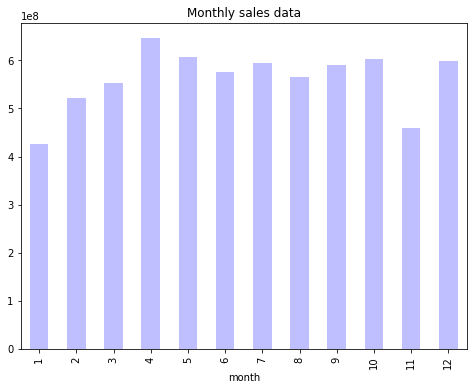

In [196]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,6))
monthly_sales1.plot(kind='bar',color='blue',alpha=0.25)
plt.title("Monthly sales data")
plt.show()

In [192]:
yearly_sales=Walmart_data['Weekly_Sales'].groupby(Walmart_data['year']).mean()
yearly_sales1=yearly_sales.sort_index(ascending=True)
yearly_sales1

year
2010    1.059670e+06
2011    1.046239e+06
2012    1.033660e+06
Name: Weekly_Sales, dtype: float64

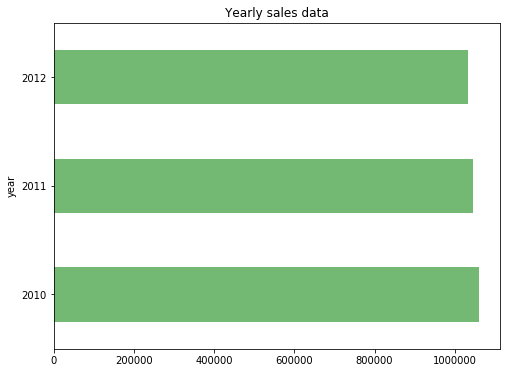

In [193]:
plt.figure(figsize=(8,6))
yearly_sales1.plot(kind='barh',color='green',alpha=0.55)
plt.title("Yearly sales data")
plt.show()

In [191]:
# For Store 1 – Build prediction models to forecast demand 
# 1. Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). 
# Hypothesize if CPI, unemployment, and fuel price have any impact on sales. 


store1_df=Walmart_data[Walmart_data['Store']==1]
store1_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DataTime,Qtr,year,month
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,2010Q1,2010,5
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,2010Q1,2010,12
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,2010Q1,2010,2
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,2010Q1,2010,2
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,2010Q1,2010,5


In [199]:
store1_df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'DataTime', 'Qtr', 'year',
       'month'],
      dtype='object')

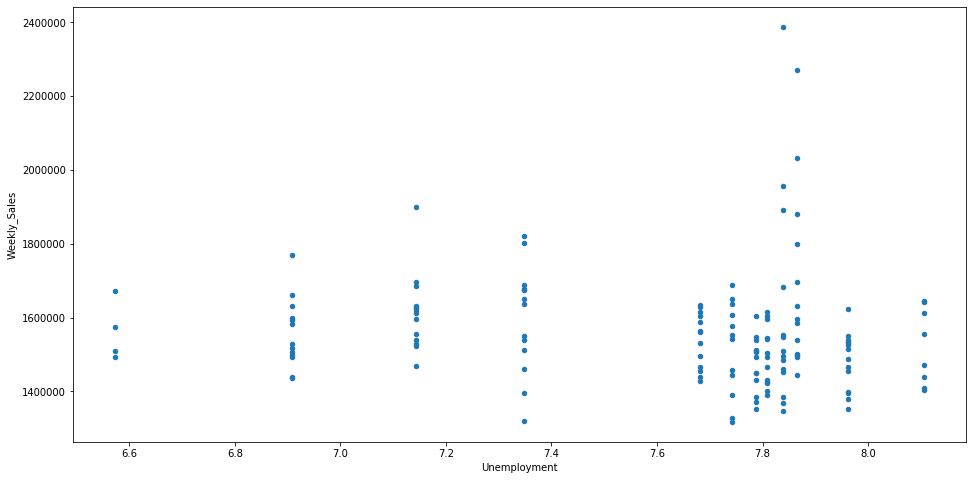

In [200]:
store1_df.plot(kind='scatter', x='Unemployment', y='Weekly_Sales', figsize=(16, 8))

In [202]:
features=store1_df[['Holiday_Flag', 'Temperature', 'Fuel_Price','CPI', 'Unemployment']]
features.head()

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,0,42.31,2.572,211.096358,8.106
1,1,38.51,2.548,211.242170,8.106
2,0,39.93,2.514,211.289143,8.106
3,0,46.63,2.561,211.319643,8.106
4,0,46.50,2.625,211.350143,8.106


In [204]:
y=store1_df[['Weekly_Sales']]

In [210]:
from sklearn.model_selection import train_test_split

In [208]:
features=store1_df[['Holiday_Flag', 'Temperature', 'Fuel_Price','CPI', 'Unemployment','Weekly_Sales']]
features.head()

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
0,0,42.31,2.572,211.096358,8.106,1643690.90
1,1,38.51,2.548,211.242170,8.106,1641957.44
2,0,39.93,2.514,211.289143,8.106,1611968.17
3,0,46.63,2.561,211.319643,8.106,1409727.59
4,0,46.50,2.625,211.350143,8.106,1554806.68


In [209]:
train,test = train_test_split(features,test_size=0.2,random_state=39)

In [211]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Weekly_Sales ~ Temperature + Holiday_Flag + Fuel_Price + CPI +  Unemployment' , data=train).fit()

In [212]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     5.592
Date:                Tue, 19 May 2020   Prob (F-statistic):           0.000127
Time:                        19:33:47   Log-Likelihood:                -1502.9
No. Observations:                 114   AIC:                             3018.
Df Residuals:                     108   BIC:                             3034.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.206e+06   1.78e+06     -1.240      0.218   -5.73e+06    1.32e+06
Temperature  -2582.6024    971.702     -2.658      0.009   -4508.685    -656.520
Holiday_Flag  9.712e+04   5.06e+04      1.921      0.057   -3107.707    1.97e+05
Fuel_Price   -1.488e+04   4.71e+04     -0.316      0.752   -1.08e+05    7.84e+04
CPI           1.602e+04   6877.873      2.329      0.022    2383.676    2.96e+04
Unemployment  6.727e+04   5.87e+04      1.147      0.254    -4.9e+04    1.84e+05
==============================================================================
Omnibus:                       38.329   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.017
Skew:                           1.238   Prob(JB):                     7.03e-23
Kurtosis:                       6.917   Cond. No.                     3.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [213]:
lm = smf.ols(formula='Weekly_Sales ~ Temperature + Holiday_Flag  + CPI ' , data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     8.935
Date:                Tue, 19 May 2020   Prob (F-statistic):           2.39e-05
Time:                        19:34:13   Log-Likelihood:                -1503.6
No. Observations:                 114   AIC:                             3015.
Df Residuals:                     110   BIC:                             3026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -4.474e+05   6.32e+05     -0.707      0.481    -1.7e+06    8.06e+05
Temperature  -2779.9958    915.429     -3.037      0.003   -4594.161    -965.831
Holiday_Flag  1.064e+05   4.96e+04      2.148      0.034    8220.541    2.05e+05
CPI           1.009e+04   2930.164      3.442      0.001    4279.643    1.59e+04
==============================================================================
Omnibus:                       43.875   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.782
Skew:                           1.350   Prob(JB):                     4.43e-31
Kurtosis:                       7.705   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [241]:
# 2. Change dates into days by creating new variable.

Walmart_data['Day']=Walmart_data.DataTime.dt.day

In [242]:
Walmart_data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DataTime,Qtr,year,month,Day
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,2010Q1,2010,5,5
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,2010Q1,2010,12,12
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,2010Q1,2010,2,19
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,2010Q1,2010,2,26
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,2010Q1,2010,5,5
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106,2010-03-12,2010Q1,2010,12,12
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106,2010-03-19,2010Q1,2010,3,19
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106,2010-03-26,2010Q1,2010,3,26
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808,2010-04-02,2010Q2,2010,2,2
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808,2010-04-09,2010Q2,2010,9,9
